In [52]:
# Importacao de pacotes
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from ipywidgets import widgets
from ising2d import *

np.seterr(divide = 'ignore', invalid = 'ignore'); # ignora warnings sobre divisao por zero (no calculo da probabilidade de flipar os spins para T = 0)

$$E = - J \sum_{\langle i, j \rangle}\sigma_i \sigma_j - h \sum_i \sigma_i$$

In [53]:
# Inicializacao das variaveis da simulacao
L = 10 # tamanho do array de spins
N = 1000 # numero de varreduras
J = 1 # constante de interacao entre os spins
h = 0 # constante de interacao do spin com o campo magnetico externo
kB = 1 # constante de Boltzmann

Tmin = 0 # temperatura minima (bem proxima de zero)
Tmax = 5 # temperatura maxima
DeltaT = 0.1 # passo das temperaturas
vecT = np.arange(Tmin, Tmax + DeltaT, DeltaT) # vetor de temperaturas
NT = len(vecT) # tamanho do vetor de temperaturas

spins = np.zeros((L, L, N, NT))

In [54]:
spins.shape
# (i, j, n, k)

(10, 10, 1000, 51)

In [55]:
# Simulacao para cada temperatura
for T, k in zip(vecT, range(NT)):
    spins[:, :, :, k] = metropolis(L, N, T, J, h, kB)

In [56]:
m = spins.sum(axis = 0).sum(axis = 0)/(L * L) # array de magnetizacao media para cada passo de monte carlo em cada temperatura

In [57]:
m.shape
# (n, k)

(1000, 51)

In [58]:
mm = m.mean(axis = 0) # magnetizacao media (em equilibrio termico) para cada temperatura

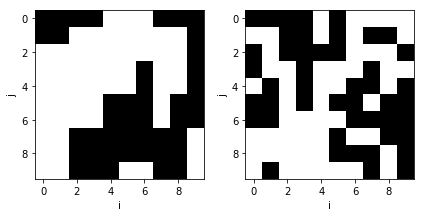

In [59]:
fig, ax = plt.subplots(1, 2)
# Figuras das configuracoes
ax[0].imshow(spins[:, :, N - 1, 0].T, aspect = 'equal', cmap = plt.cm.binary)
ax[0].set_xlabel('i')
ax[0].set_ylabel('j')

ax[1].imshow(spins[:, :, N - 1, -1].T, aspect = 'equal', cmap = plt.cm.binary)
ax[1].set_xlabel('i')
ax[1].set_ylabel('j')

plt.tight_layout()
plt.show()

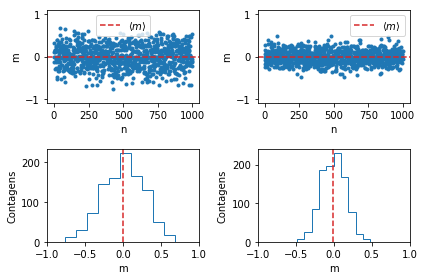

T = 0.00
media de m = 0.00110
desvio padrao de m = 0.26474
desvio padrao de <m> = 0.00837

T = 5.00
media de m = -0.00716
desvio padrao de m = 0.15406
desvio padrao de <m> = 0.00487



In [60]:
fig, ax = plt.subplots(2, 2)
# Scatter plot
ax[0, 0].plot(m[:, 0], '.')
ax[0, 0].axhline(m[:, 0].mean(), ls = '--', color = 'tab:red',
                 label = r'$\langle m \rangle$')
ax[0, 0].set_ylim(-1.1, 1.1)
ax[0, 0].set_xlabel('n')
ax[0, 0].set_ylabel('m')
ax[0, 0].legend()

ax[0, 1].plot(m[:, -1], '.')
ax[0, 1].axhline(m[:, -1].mean(), ls = '--', color = 'tab:red',
                 label = r'$\langle m \rangle$')
ax[0, 1].set_ylim(-1.1, 1.1)
ax[0, 1].set_xlabel('n')
ax[0, 1].set_ylabel('m')
ax[0, 1].legend()

# Histogramas
ax[1, 0].hist(m[:, 0], histtype = 'step')
ax[1, 0].axvline(m[:, 0].mean(), ls = '--', color = 'tab:red',
                 label = r'$\langle m \rangle$')
ax[1, 0].set_xlim(-1, 1)
ax[1, 0].set_xlabel('m')
ax[1, 0].set_ylabel('Contagens')

ax[1, 1].hist(m[:, -1], histtype = 'step')
ax[1, 1].axvline(m[:, -1].mean(), ls = '--', color = 'tab:red',
                 label = r'$\langle m \rangle$')
ax[1, 1].set_xlim(-1, 1)
ax[1, 1].set_xlabel('m')
ax[1, 1].set_ylabel('Contagens')

plt.tight_layout()
plt.show()

for k in [0, -1]:
    print('T = {:.2f}'.format(vecT[k]))
    print('media de m = {:.5f}'.format(mm[k]))
    print('desvio padrao de m = {:.5f}'.format(m[:, k].std()))
    print('desvio padrao de <m> = {:.5f}\n'.format(m[:, k].std()/np.sqrt(N)))

# comentarios:
# m representa a magnetizacao por sitio de cada passo de monte carlo (N passos)
# <m> representa a magnetizacao por sitio media desses N passos

In [61]:
# Calculo da energia por sítio
E = np.zeros((N, NT))
for k in range(NT):
    for n in range(N):
        E[n, k] = H(spins[:, :, n, k], J, h)

In [62]:
E.shape

(1000, 51)

In [63]:
Em = E.mean(axis = 0)/(L*L)

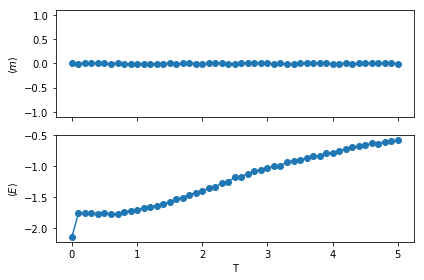

In [70]:
fig, ax = plt.subplots(2, 1, sharex = True)
ax[0].plot(vecT, mm, '-o')
ax[0].set_ylabel(r'$\langle m \rangle$')
ax[0].set_ylim(-1.1, 1.1)

ax[1].plot(vecT, Em, '-o')
ax[1].set_xlabel('T')
ax[1].set_ylabel(r'$\langle E \rangle$')


plt.tight_layout()
plt.show()